In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
import seaborn as sns
from scipy import linalg

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorNeuropixelsProjectCache

import psytrack as psy
import src.psy_tools as ps
import src.psy_general_tools as pgt
import src.psy_metrics_tools as pm


In [15]:
drive_dir = "/Volumes/Brain2024"
plot_dir = 'plots/explore/'
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(cache_dir=drive_dir, use_static_cache=True)

In [16]:
behavior_sessions = cache.get_behavior_session_table()

In [17]:
behavior_sessions.head()

,equipment_name,genotype,mouse_id,sex,age_in_days,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ecephys_session_id,date_of_acquisition,session_type,image_set,file_id
behavior_session_id,,,,,,,,,,,,,,
1040882886,NP.1,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,506940,M,253,18,0,6,0,1040871931,2020-08-04 16:30:32.835000+00:00,HABITUATION_5_images_G_handoff_ready_5uL_reward,G,1022
1042886405,NP.0,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,506940,M,262,24,6,12,0,1042863451,2020-08-13 16:45:10.869000+00:00,HABITUATION_5_images_G_handoff_ready_5uL_reward,G,1023
1042328825,NP.0,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,506940,M,260,22,4,10,0,1042309765,2020-08-11 13:38:10.476000+00:00,HABITUATION_5_images_G_handoff_ready_5uL_reward,G,1024
1041062566,NP.1,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,506940,M,254,19,1,7,0,1041050914,2020-08-05 09:27:22.482000+00:00,HABITUATION_5_images_G_handoff_ready_5uL_reward,G,1025
1042578564,NP.0,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,506940,M,261,23,5,11,0,1042566236,2020-08-12 13:13:12.237000+00:00,HABITUATION_5_images_G_handoff_ready_5uL_reward,G,1026


<span style="color:orange">__Question__:</span> but cannot directly get behavior data? Nope now it works!


In [18]:
1053960987 in behavior_sessions.index

True

In [19]:
# behavior_session = cache.get_behavior_session(bsid) # this will give me FileNotFoundError 

In [20]:
# # ecephys_session_id
# session_id = 1053941483 
# session = cache.get_ecephys_session(session_id)
# metadata = session.metadata
# metadata

In [21]:
bsid = 1053960987

In [22]:
behavior_session = cache.get_behavior_session(bsid)

/opt/anaconda3/envs/swdb2024/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


In [23]:
behavior_session.licks.head()

,timestamps,frame
0,25.72309,91
1,25.85921,100
2,28.01198,229
3,32.39186,491
4,35.52050,679


In [24]:
pm.annotate_licks(behavior_session)

In [25]:
behavior_session.licks.head()

,timestamps,frame,pre_ili,post_ili,bout_start,bout_end,bout_number,rewarded,num_rewards,bout_rewarded,bout_num_rewards
0,25.72309,91,1.40000,0.13612,True,False,1,False,0,False,0
1,25.85921,100,0.13612,2.15277,False,True,1,False,0,False,0
2,28.01198,229,2.15277,4.37988,True,True,2,False,0,False,0
3,32.39186,491,4.37988,3.12864,True,True,3,False,0,False,0
4,35.52050,679,3.12864,3.63009,True,True,4,False,0,False,0


In [26]:
stimulus_presentations = behavior_session.stimulus_presentations[behavior_session.stimulus_presentations.active == True]

In [27]:
stimulus_presentations = pm.annotate_bouts_loc(behavior_session, stimulus_presentations)

In [43]:
format_options = {'timing0/1':True,  #  timing is a vector of 0s and 1s
                  'mean_center':True, 
                  'timing_params': [4,-5],
                  'ignore_trial_errors': False,
                  'num_cv_folds': 10}

In [29]:
ps.annotate_stimulus_presentations_np(stimulus_presentations, ignore_trial_errors = format_options['ignore_trial_errors'])

In [30]:
columns = ['start_time','hits','misses',
    'aborts','is_change','omitted','licked','bout_start',
    'bout_end','num_bout_start','num_bout_end','in_lick_bout']

df = pd.DataFrame(data = stimulus_presentations[columns])
df = df.rename(columns={'is_change':'change'})

# Process behavior annotations
df['y'] = np.array([2 if x else 1 for x in 
    stimulus_presentations.bout_start.values]) # predict bout start
df['images_since_last_lick'] = stimulus_presentations.groupby(\
    stimulus_presentations['bout_end'].cumsum()).cumcount(ascending=True)
df['timing_input'] = [x+1 for x in df['images_since_last_lick'].shift(fill_value=0)]
df['included'] = ~df['in_lick_bout']

# Build Strategy regressors

# He used multiple ways {0 1} or {-1 1} or {-1 0} for the same thing

df['task0']      = np.array([1 if x else 0 for x in df['change']]) # task change reward, use 0 or 1 to encode
df['task1']      = np.array([1 if x else -1 for x in df['change']])
df['taskCR']     = np.array([0 if x else -1 for x in df['change']]) 
df['late_task0'] = df['task0'].shift(1,fill_value=0) # okay change history
df['late_task1'] = df['task1'].shift(1,fill_value=-1)
df['omissions']  = np.array([1 if x else 0 for x in df['omitted']]) # omission
df['omissions1'] = np.array([x for x in np.concatenate([[0], # shift omission 
                    df['omissions'].values[0:-1]])]) 

# Build timing strategy using average timing parameters
df['timing1D']          = np.array(\
    [ps.timing_sigmoid(x,format_options['timing_params']) 
    for x in df['timing_input']])

df['bias'] = 1

#### Visualize design matrix:

In [31]:
strategy_list = ['task0','timing1D','omissions','omissions1','bias']
X = df[strategy_list].to_numpy()
X = X.T[:, 300:500]

In [32]:
y = df['bout_start'].to_numpy()[300:500]

/var/folders/45/vxs3qxtn0ql1mmj2dm1w3zxw0000gp/T/ipykernel_44222/2209884333.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


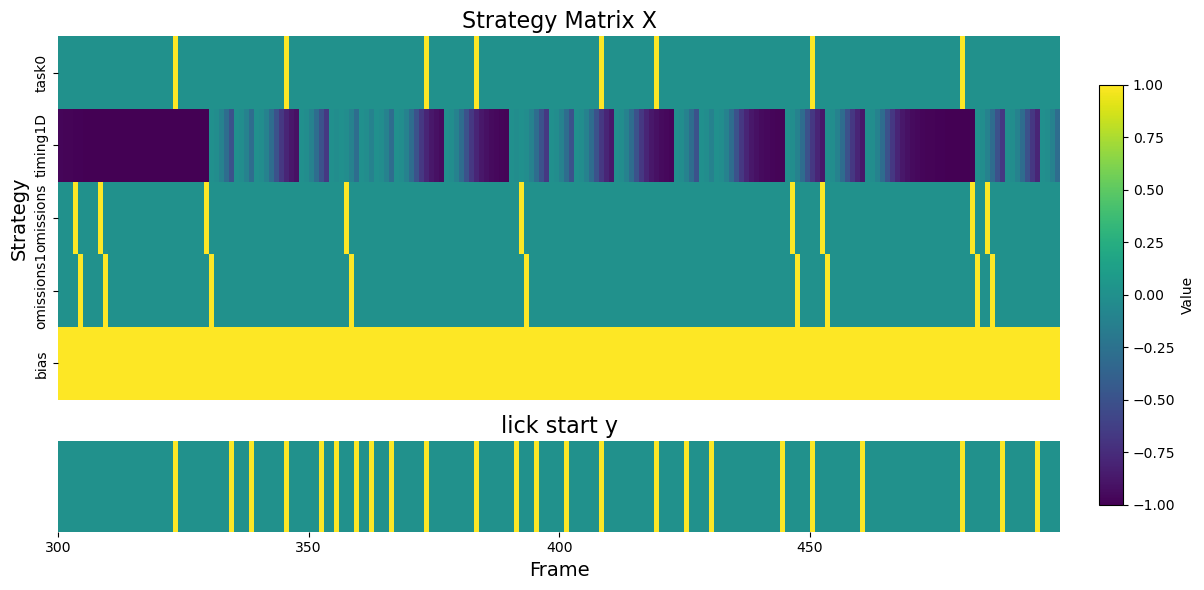

In [33]:

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), 
                               gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

# Create a color normalization object
vmin = min(X.min(), y.min())
vmax = max(X.max(), y.max())
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Plot heatmap for X
sns.heatmap(X, ax=ax1, cmap='viridis', cbar=False, norm=norm)
ax1.set_title('Strategy Matrix X', fontsize = 16)
ax1.set_ylabel('Strategy', fontsize = 14)
ax1.set_yticklabels(strategy_list)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Plot 1D heatmap for y
sns.heatmap(y.reshape(1, -1), ax=ax2, cmap='viridis', cbar=False, norm=norm)
ax2.set_title('lick start y', fontsize = 16)
ax2.set_xlabel('Frame', fontsize = 14)
ax2.set_yticks([])
ax2.set_xticks(list(range(0, 200, 50)))
ax2.set_xticklabels(list(range(300, 500, 50)), rotation = 0)

# Add a colorbar to the right of the figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(ax1.collections[0], cax=cbar_ax, label='Value')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

# fig.savefig(f'{plot_dir}design_mat.png')

In [34]:
X_full = df[strategy_list].to_numpy()

In [35]:
# Perform SVD
U, s, Vt = linalg.svd(X_full)

# Calculate effective rank
total_variance = np.sum(s**2)
cumulative_variance_ratio = np.cumsum(s**2) / total_variance
effective_rank = np.sum(cumulative_variance_ratio < 0.95)  # Using 99% of variance

print(f"Effective rank: {effective_rank}")

Effective rank: 2


In [36]:
psydata = ps.format_session(behavior_session, stimulus_presentations, format_options)

This session had 2990 licks and 142 rewards


In [58]:
# help(psy.hyperOpt)

```
Returns:
    best_hyper : hyperparameter values that maximizes evidence of data
    best_logEvd : log-evidence associated with optimal hyperparameter values
    best_wMode : the MAP weights found using best_hyper, maximizing logEvd
        Note that since the dict have no ordering, the weights in
        `best_wMode` will be ordered alphabetically from `weights`.
    hess_info : dict, Hessian info, specific info depending on `hess_calc`
```

Initial Fit
{'bias': 1, 'timing1D': 1, 'task0': 1, 'omissions1': 1, 'omissions': 1}


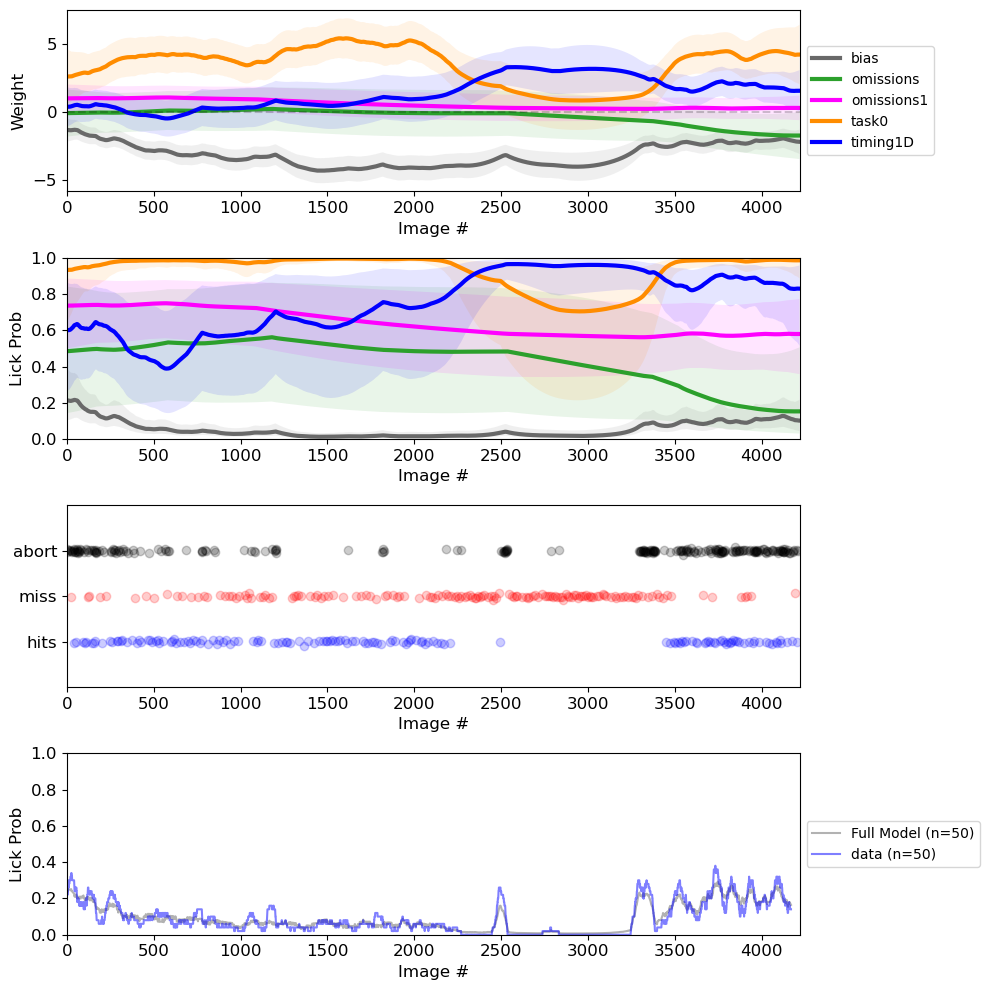

In [37]:
print("Initial Fit")
strategies={'bias','task0','timing1D','omissions','omissions1'}
if np.sum(stimulus_presentations.omitted) == 0:
    strategies.remove('omissions')
    strategies.remove('omissions1')
hyp, evd, wMode, hess, credibleInt,weights = ps.fit_weights(psydata,strategies)
ypred,ypred_each = ps.compute_ypred(psydata, wMode,weights)
ps.plot_weights(wMode, weights,psydata,errorbar=credibleInt, ypred=ypred,
    filename=f"piet_modelfit/first_weight")

In [59]:
print('log evidence, whole data fit:', evd)

log evidence, whole data fit: -916.9683790988274


In [38]:
weights_list = pgt.get_clean_string(ps.get_weights_list(weights))

In [39]:
ps.get_weights_list(weights)

['bias', 'omissions', 'omissions1', 'task0', 'timing1D']

In [40]:
weights_list

['licking bias', 'omission', 'post omission', 'visual', 'timing']

10 folds CV:

In [44]:
print("Cross Validation Analysis")
cross_psydata = psy.trim(psydata, 
END=int(np.floor(len(psydata['y'])/format_options['num_cv_folds'])\
*format_options['num_cv_folds'])) 
cross_results = ps.compute_cross_validation(cross_psydata, hyp, weights,
folds=format_options['num_cv_folds'])
cv_pred = ps.compute_cross_validation_ypred(cross_psydata, cross_results,ypred)

Cross Validation Analysis
running fold 9


In [66]:
# Get the relevant data
cv_logli = np.array([cross_results[i]['logli'] for i in range(10)])


In [69]:
print(f"log evidence, whole data fit: {cv_logli.mean():.3f} pm {cv_logli.std():.3f}")

log evidence, whole data fit: -87.859 pm 8.228
